# 303 随机梯度下降法 Stochastic Gradient Descent
模拟退火的思想：$$\eta= \frac{t_0}{i_{iters}+t_1}$$

### 梯度下降法：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
m =100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.* x + 3. + np.random.normal(0, 3, size=m)

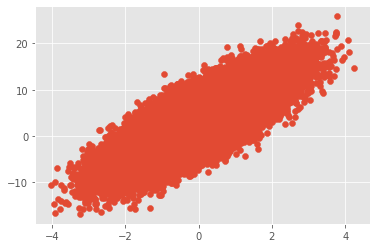

In [3]:
plt.scatter(X, y)

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1
        
    return theta

In [5]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)
print(theta)

[3.00589402 4.00316737]
Wall time: 1.84 s


### 随机梯度下降法

In [6]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)
def sgd(X_b, y, initial_theta, n_iters):
    
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0/(t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgdd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [7]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

Wall time: 2.99 ms


In [8]:
theta

array([3.00589402, 4.00316737])

### 封装我们自己的SGD

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [10]:
m =100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

In [13]:
import sys
sys.path.insert(0, './code')
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

2.998830949384035 [3.99852158]


In [12]:
lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

3.000351417801207 [3.99522299]


### 真实使用我们自己的SGD

In [15]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y<50.]
y = y[y<50.]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [17]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [18]:
import sys
sys.path.insert(0,'./code')
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg.score(X_test_standard, y_test)

Wall time: 5.98 ms


0.7802470289625223

In [19]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=50)
lin_reg.score(X_test_standard, y_test)

Wall time: 104 ms


0.8126359285730044

In [20]:
%time lin_reg.fit_sgd(X_train_standard, y_train, n_iters=100)
lin_reg.score(X_test_standard, y_test)

Wall time: 185 ms


0.8124819643254965

### scikit-learn中的SGD
scikit-learn中的SGD算法有更多的优化，速度更快。

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()                      # 貌似n_iter不要改
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

Wall time: 69.8 ms


0.8128874348397538